## Predictive Modeling for Insurance Claims
#### Name: Ssematimba Joel
#### Registration No: 2023/HD05/27861U
#### Student No: 2300727861
####

## 1. Data Exploration and Preprocessing:
## - Load the datasets using Pandas.
## - Explore the data's structure, distributions, and missing values.
## - Handle missing values appropriately (imputation or removal).
## - Encode categorical variables if necessary.

In [752]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


- Load the datasets using Pandas.

In [753]:
# my dataframe
VariableDescriptionDF = pd.read_csv('dataset/VariableDescription.csv')
SampleSubmissionDF = pd.read_csv('dataset/SampleSubmission.csv')
test_dataDF = pd.read_csv('dataset/test_data.csv')
train_dataDF = pd.read_csv('dataset/train_data.csv')

##VariableDescriptionDF.head()
##SampleSubmissionDF.head()
##test_dataDF.head()
##train_dataDF.head()


- Explore the data's structure, distributions, and missing values For the Variable Description

In [754]:
VariableDescriptionDF.describe()

test_dataDF.describe()
train_dataDF.describe()


,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [755]:
missing_values = VariableDescriptionDF.isnull()
missing_values


,Variable,Description
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [756]:
missing_values.sum()

Variable       0
Description    0
dtype: int64

- Explore the data's structure, distributions, and missing values For the Sample submission

In [757]:
print(SampleSubmissionDF)

SampleSubmissionDF.describe()

     Customer Id  Claim
0             H0      1
1         H10000      1
2         H10001      1
3         H10002      1
4         H10003      1
...          ...    ...
3063       H9987      1
3064       H9988      1
3065       H9994      1
3066       H9996      1
3067       H9998      1

[3068 rows x 2 columns]


,Claim
count,3068.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [758]:
claimDistribution = SampleSubmissionDF['Claim']
# claimDistribution

tab = pd.crosstab(index=claimDistribution, columns='count')
print(tab)
# #find proportions 
print(((tab/tab.sum())*100))


col_0  count
Claim       
1       3068
col_0  count
Claim       
1      100.0


In [759]:
# i merge the two dataset to have our target variable as part of our working dataset.

# test_dataDF = test_dataDF.merge(SampleSubmissionDF, on='Customer Id', how='inner')

Explore the data's structure, distributions, and missing values For the test Data

In [760]:
test_dataDF.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy
count,3069.000000,3069.000000,3069.000000,3056.000000,3069.000000,2341.000000
mean,2013.593679,0.922806,0.224177,1666.790576,2.359400,1966.781717
std,1.372138,0.219066,0.417107,2251.180599,0.998464,25.238702
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1750.000000
25%,2012.000000,1.000000,0.000000,470.000000,2.000000,1960.000000
50%,2013.000000,1.000000,0.000000,900.000000,2.000000,1968.000000
75%,2015.000000,1.000000,0.000000,1957.000000,3.000000,1980.000000
max,2016.000000,1.000000,1.000000,30745.000000,4.000000,2012.000000


In [761]:
missing_values = test_dataDF.isnull()
missing_values

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,False,False,False,False,False,False,False,False,True,False,False,False,True
3065,False,False,False,False,False,False,False,False,True,False,False,False,True
3066,False,False,False,False,False,False,False,False,True,False,False,False,True
3067,False,False,False,False,False,False,False,False,True,False,False,False,True


In [762]:
# Summary/ Summation for missing Values

missing_values.sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

Working on Test dataset.

Handle missing values appropriately (imputation or removal). will work with imputation because Date_of_Occupancy has a significant number of missing values and i belive will affect the functionaly of the model if all these rows are deleted. Imputation with mean.

In [763]:
# We observe 4 columns with missing values from the summation printout of missing values
# Columns Date_of_Occupancy and Building Dimension have numerical dtypes, imputation with mean is possible for the columns. Replace missing values with the mean of the 
# non-missing values in the respective column.


test_dataDF['Date_of_Occupancy'].fillna(test_dataDF['Date_of_Occupancy'].mean(), inplace=True)
test_dataDF['Building Dimension'].fillna(test_dataDF['Building Dimension'].mean(), inplace=True)
# test_dataDF['Geo_Code'].fillna(test_dataDF['Geo_Code'].Median(), inplace=True)
# test_dataDF['Garden'].fillna(test_dataDF['Garden'].Median(), inplace=True)
# test_dataDF['Garden'] = test_dataDF['Garden'].interpolate(method='linear')
# test_dataDF['Garden'].fillna(method='ffill', inplace=True)
# test_dataDF['Geo_Code'].fillna(method = 'ffill', inplace=True)


# For Columns Geo_Code and Garden, i will use Forward Fill (ffill) or Backward Fill (bfill): Use the last known value (forward fill) or the next known value (backward fill) 
# to replace missing values in time series data.
test_dataDF['Geo_Code'] = test_dataDF['Geo_Code'].ffill()
test_dataDF['Garden'] = test_dataDF['Garden'].ffill()


missing_values = test_dataDF.isnull()
missing_values.sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

Sorting Categorical values in our test dataset.

In [764]:
# Inspection of the data and all columns

pd.options.display.max_columns = None
print(test_dataDF.head(20))

   Customer Id  YearOfObservation  Insured_Period  Residential  \
0       H11920               2013        1.000000            0   
1       H11921               2016        0.997268            0   
2        H9805               2013        0.369863            0   
3        H7493               2014        1.000000            0   
4        H7494               2016        1.000000            0   
5       H10545               2012        1.000000            0   
6        H8962               2015        0.986301            0   
7        H1015               2013        1.000000            0   
8        H9710               2012        1.000000            0   
9        H9029               2012        1.000000            0   
10      H11274               2012        1.000000            0   
11      H10785               2012        1.000000            0   
12      H10786               2013        0.832877            0   
13        H882               2012        1.000000            0   
14      H1

In [765]:
# Summarising columns with dtypes for the test dataset

print(test_dataDF.dtypes)

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
dtype: object


In [766]:
# handling categorical values,  i start with column Garden, understanding its distribution 
tab = pd.crosstab(index=test_dataDF['Garden'], columns='count')
tab/tab.sum()


col_0,count
Garden,
O,0.269143
V,0.730857


In [767]:
# convertion to numerial values
test_dataDF['Garden'] = test_dataDF['Garden'].map({'O': 0, 'V': 1})


In [768]:
# handling categorical values,  i start with column Building_Painted, understanding its distribution 
tab2 = pd.crosstab(index=test_dataDF['Building_Painted'], columns='count')
tab2/tab2.sum()

col_0,count
Building_Painted,
N,0.451287
V,0.548713


In [769]:
# convertion to numerial values
test_dataDF['Building_Painted'] = test_dataDF['Building_Painted'].map({'N': 0, 'V': 1})

In [770]:
# handling categorical values,  i start with column Building_Fenced, understanding its distribution 
tab3 = pd.crosstab(index=test_dataDF['Building_Fenced'], columns='count')
tab3/tab3.sum()

col_0,count
Building_Fenced,
N,0.270121
V,0.729879


In [771]:
# convertion to numerial values
test_dataDF['Building_Fenced'] = test_dataDF['Building_Fenced'].map({'N': 0, 'V': 1})

In [772]:
# handling categorical values,  i start with column Settlement, understanding its distribution 
tab4 = pd.crosstab(index=test_dataDF['Settlement'], columns='count')
tab4/tab4.sum()

col_0,count
Settlement,
R,0.270121
U,0.729879


In [773]:
# convertion to numerial values
test_dataDF['Settlement'] = test_dataDF['Settlement'].map({'R': 0, 'U': 1})

In [774]:
# handling categorical values,  i start with column NumberOfWindows, understanding its distribution 
tab5 = pd.crosstab(index=test_dataDF['NumberOfWindows'], columns='count')
tab5/tab5.sum()

col_0,count
NumberOfWindows,
.,0.729879
1,0.005213
2,0.022809
3,0.073965
4,0.063213
5,0.049202
6,0.022809
7,0.017595
8,0.008472


In [775]:
# convertion to numerial values
test_dataDF['NumberOfWindows'] = test_dataDF['NumberOfWindows'].map({'   .': 0,'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,'>=10': 10})

In [776]:
# handling categorical values,  i start with column NumberOfWindows, understanding its distribution 
tab6 = pd.crosstab(index=test_dataDF['NumberOfWindows'], columns='count')
tab6/tab6.sum()

col_0,count
NumberOfWindows,
0,0.729879
1,0.005213
2,0.022809
3,0.073965
4,0.063213
5,0.049202
6,0.022809
7,0.017595
8,0.008472


In [777]:
# dummy = pd.get_dummies(test_dataDF['Geo_Code'])
# dummy.head()
# dummy2 = pd.concat((test_dataDF, dummy), axis=1)

# print(dummy2)

print(test_dataDF.dtypes)

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int64
Building_Fenced         int64
Garden                  int64
Settlement              int64
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows         int64
Geo_Code               object
dtype: object


In [778]:
# handling categorical values,  i start with column Geo_Code, understanding its distribution 
tab7 = pd.crosstab(index=test_dataDF['Geo_Code'], columns='count')
tab7/tab7.sum()

col_0,count
Geo_Code,
10333,0.000326
11262,0.001629
11441,0.000326
12052,0.000326
12145,0.000326
...,...
95313,0.000652
95394,0.000326
95500,0.000326


## Working on Train dataset.

Handle missing values appropriately (imputation or removal). will work with imputation because Date_of_Occupancy has a significant number of missing values and i belive will affect the functionaly of the model if all these rows are deleted. Imputation with mean.

In [779]:
train_dataDF.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [780]:
# Working on missing values for the train dataset

missing_values = train_dataDF.isnull()
missing_values


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,False,False,False,False,False,False,False,False,True,False,False,False,True,False
7156,False,False,False,False,False,False,False,False,True,False,False,False,True,False
7157,False,False,False,False,False,False,False,False,True,False,False,False,True,False
7158,False,False,False,False,False,False,False,False,True,False,False,False,True,False


In [781]:
missing_values.sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [782]:
# We observe 4 columns with missing values from the summation printout of missing values
# Columns Date_of_Occupancy and Building Dimension have numerical dtypes, imputation with mean is possible for the columns. Replace missing values with the mean of the 
# non-missing values in the respective column.


train_dataDF['Date_of_Occupancy'].fillna(train_dataDF['Date_of_Occupancy'].mean(), inplace=True)
train_dataDF['Building Dimension'].fillna(train_dataDF['Building Dimension'].mean(), inplace=True)

# For Columns Geo_Code and Garden, i will use Forward Fill (ffill) or Backward Fill (bfill): Use the last known value (forward fill) or the next known value (backward fill) 
# to replace missing values in time series data.
train_dataDF['Geo_Code'] = train_dataDF['Geo_Code'].ffill()
train_dataDF['Garden'] = train_dataDF['Garden'].ffill()


missing_values = train_dataDF.isnull()
missing_values.sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [783]:
## commercing sorting of categorical data

train_dataDF.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

In [784]:
def get_categorical_columns(train_dataDF):
  categorical_columns = []
  for column in train_dataDF.columns:
    if train_dataDF[column].dtype == 'object':
      categorical_columns.append(column)
  return categorical_columns


# Get the categorical columns.
categorical_columns = get_categorical_columns(train_dataDF)

# Print the categorical columns.
print(categorical_columns)

['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows', 'Geo_Code']


## mapping all categorical data in train dataset

In [785]:
train_dataDF['Garden'] = train_dataDF['Garden'].map({'O': 0, 'V': 1})
train_dataDF['Building_Painted'] = train_dataDF['Building_Painted'].map({'N': 0, 'V': 1})
train_dataDF['Building_Fenced'] = train_dataDF['Building_Fenced'].map({'N': 0, 'V': 1})
train_dataDF['Settlement'] = train_dataDF['Settlement'].map({'R': 0, 'U': 1})
train_dataDF['NumberOfWindows'] = train_dataDF['NumberOfWindows'].map({'   .': 0,'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,'>=10': 10})

train_dataDF.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int64
Building_Fenced         int64
Garden                  int64
Settlement              int64
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows         int64
Geo_Code               object
Claim                   int64
dtype: object

In [786]:
# handling categorical values,  i start with column Garden, understanding its distribution 
taba = pd.crosstab(index=train_dataDF['Geo_Code'], columns='count')
taba/taba.sum()

col_0,count
Geo_Code,
10033,0.000140
10081,0.000140
10297,0.000140
10333,0.000559
10343,0.000140
...,...
95563,0.000419
95582,0.000419
95585,0.000978


## 2. Feature Selection:
## - Select relevant features for building the predictive model.
## - Justify the selection of features based on insights from the data exploration

In [787]:
def get_categorical_columns(df):
  categorical_columns = []
  for column in train_dataDF.columns:
    if train_dataDF[column].dtype == 'object':
      categorical_columns.append(column)
  return categorical_columns


# Get the categorical columns.
categorical_columns = get_categorical_columns(train_dataDF)

# Print the categorical columns.
print(categorical_columns)
train_data = train_dataDF
train_dataDF = train_dataDF.drop(columns=categorical_columns)

train_dataDF.dtypes

['Customer Id', 'Geo_Code']


YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int64
Building_Fenced         int64
Garden                  int64
Settlement              int64
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows         int64
Claim                   int64
dtype: object

#### Features selected with high correlation with Claim, Features like customer ID and Geo Code are droped.

Claim                 1.000000
Building Dimension    0.295216
NumberOfWindows       0.136705
Building_Type         0.112168
Insured_Period        0.088715
Residential           0.063509
Garden                0.052626
Settlement            0.052019
Building_Fenced       0.051657
Building_Painted      0.029857
Date_of_Occupancy     0.018537
YearOfObservation     0.016367
Name: Claim, dtype: float64
['Claim', 'Building Dimension', 'NumberOfWindows', 'Building_Type', 'Insured_Period', 'Residential', 'Garden', 'Settlement', 'Building_Fenced']


<Axes: >

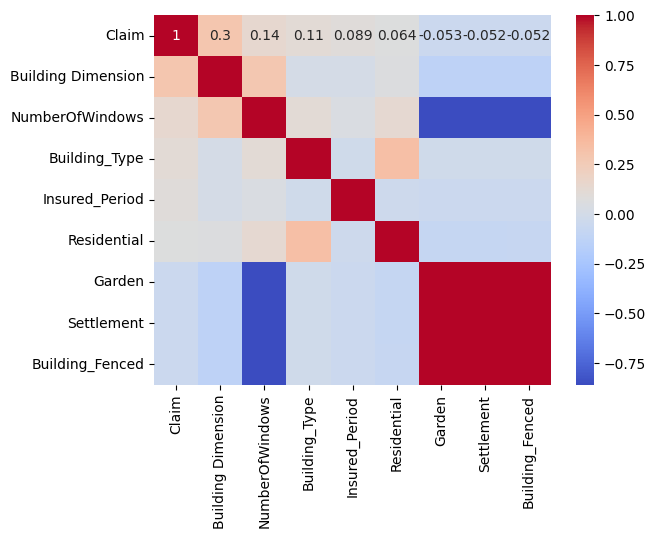

In [788]:
# Calculate the correlation between Claim and other columns 
corr_return = train_dataDF.corr()['Claim'].abs().sort_values(ascending=False)
print(corr_return)

# Selection  with correlation threshold(0.1)
threshold_targets = corr_return[corr_return > 0.05].index.tolist()
print(threshold_targets)

# Calculate the correlation matrix between features
feature_matrix = train_dataDF[threshold_targets].corr()
# print(print(threshold_targets))

# Visualize the correlation matrix (optional)
import seaborn as sns
sns.heatmap(feature_matrix, annot=True, cmap='coolwarm')

## 3. Model Building:
## - Implement SVM, Linear Regression, KNN, and Naive Bayes models using Scikit-Learn.
## - Train the models using the training dataset.
## - Tune hyperparameters for each model using techniques like Grid Search or Random Search.


#### Scaling the training data.

In [789]:
# Scaling using Standard scaler

scaler = StandardScaler()

train_dataDF.drop('Claim', axis=1)  
train_dataDF = pd.DataFrame(train_dataDF)


#pass arry of clumns
# columns_to_scale = threshold_targets 

columns_to_scale = ['Building Dimension', 'NumberOfWindows', 'Building_Type', 'Insured_Period', 'Residential', 'Garden', 'Settlement', 'Building_Fenced']
 


# print(columns_to_scale)

scaled_columns = pd.DataFrame(scaler.fit_transform(train_dataDF[columns_to_scale]), columns=columns_to_scale)
# print(scaled_columns)

train_dataDF = pd.concat([scaled_columns, train_dataDF.drop(columns_to_scale, axis=1)], axis=1)
train_dataDF = train_dataDF[threshold_targets]
print(train_dataDF)


      Claim  Building Dimension  NumberOfWindows  Building_Type  \
0         0           -0.704855        -0.867014      -1.260978   
1         0           -0.616401         0.721070      -1.260978   
2         0           -0.569963        -0.867014      -1.260978   
3         0            0.422929        -0.867014      -1.260978   
4         0           -0.532370         0.324049      -1.260978   
...     ...                 ...              ...            ...   
7155      0            0.000000        -0.867014      -1.260978   
7156      1            0.000000        -0.867014      -0.197789   
7157      0            0.000000        -0.867014      -1.260978   
7158      0            0.000000        -0.867014      -1.260978   
7159      0            0.000000        -0.867014      -1.260978   

      Insured_Period  Residential    Garden  Settlement  Building_Fenced  
0           0.376419    -0.663155  1.007289    1.008415         1.007852  
1           0.376419    -0.663155 -0.992764  

#### Scaling the test data.

In [790]:
# Scaling using Standard scaler

scaler = MinMaxScaler()

test_dataDF = pd.DataFrame(test_dataDF)
test_data = pd.DataFrame(test_dataDF)

#pass arry of clumns
# columns_to_scale = threshold_targets
columns_to_scale = ['Building Dimension', 'NumberOfWindows', 'Building_Type', 'Insured_Period', 'Residential', 'Garden', 'Settlement', 'Building_Fenced']

scaled_columns = pd.DataFrame(scaler.fit_transform(test_dataDF[columns_to_scale]), columns=columns_to_scale)
test_dataDF = pd.concat([scaled_columns, test_dataDF.drop(columns_to_scale, axis=1)], axis=1)
# test_dataDF = train_dataDF[threshold_targets]
# print(test_dataDF[columns_to_scale])
print(threshold_targets)
test_dataDF = test_dataDF[columns_to_scale]
print(test_dataDF)

['Claim', 'Building Dimension', 'NumberOfWindows', 'Building_Type', 'Insured_Period', 'Residential', 'Garden', 'Settlement', 'Building_Fenced']
      Building Dimension  NumberOfWindows  Building_Type  Insured_Period  \
0               0.009725              0.3       0.000000        1.000000   
1               0.009725              0.3       0.000000        0.997268   
2               0.025664              0.0       0.000000        0.369863   
3               0.045667              0.3       0.000000        1.000000   
4               0.045667              0.3       0.000000        1.000000   
...                  ...              ...            ...             ...   
3064            0.054183              0.0       1.000000        1.000000   
3065            0.054183              0.0       0.333333        1.000000   
3066            0.054183              0.0       0.333333        1.000000   
3067            0.054183              0.0       0.000000        1.000000   
3068            0.05

#### Implement SVM

In [791]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# defining the train x and y
y_train_M = train_dataDF['Claim']
X_train_M = train_dataDF.drop('Claim', axis=1)  

X_train, X_test, y_train, y_test = train_test_split(X_train_M, y_train_M, train_size=0.2, test_size=0.8, random_state=42)

# defining the test x and y
y_test_SVM = y_test
X_test_SVM = X_test

y_train_SVM = y_train
X_train_SVM = X_train


# # Check the shapes of the resulting sets
# print("Shape of X_train:", X_train_SVM.shape)
# print("Shape of X_test:", X_test_SVM.shape)
# print("Shape of y_train:", y_train_SVM.shape)
# print("Shape of y_test:", y_test_SVM.shape)


# SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# svm_classifier = SVC(kernel = 'rbf', random_state = 0)
svm_classifier.fit(X_train_SVM, y_train_SVM)


#predictions on the test set
y_pred_SVM = svm_classifier.predict(X_test_SVM)

# Evaluate the performance
accuracy = accuracy_score(y_test_SVM, y_pred_SVM)
conf_matrix = confusion_matrix(y_test_SVM, y_pred_SVM)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


report = classification_report(y_test_SVM, y_pred_SVM)
print("Classification Report:\n", report)
print("Confusion Matrix: \n", classification_report)

Accuracy: 0.7789804469273743
Confusion Matrix:
 [[4377   45]
 [1221   85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.87      4422
           1       0.65      0.07      0.12      1306

    accuracy                           0.78      5728
   macro avg       0.72      0.53      0.50      5728
weighted avg       0.75      0.78      0.70      5728

Confusion Matrix: 
 <function classification_report at 0x000001D3664A05E0>


#### Tune hyperparameters for each model using techniques like Grid Search or Random Search For SVM


In [792]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.772 total time=   0.7s


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.772 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.771 total time=   0.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.772 total time=   0.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.772 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.777 total time=   0.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.777 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.777 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.781 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.772 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.772 total time=   0.6s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.771 total time=   0.6s
[CV 4/5] END .....C=0.1, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [793]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [808]:
grid_predictions = grid.predict(X_test) 

SVMHPaccuracy = accuracy_score(y_test, y_pred_SVM)

# conf_matrix = confusion_matrix(y_test_SVM, y_pred)

print("Accuracy:", SVMHPaccuracy)
# print classification report 
print(classification_report(y_test, grid_predictions)) 

[0 0 0 ... 0 0 0]
Accuracy: 0.7789804469273743
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      4422
           1       0.71      0.13      0.22      1306

    accuracy                           0.79      5728
   macro avg       0.75      0.56      0.55      5728
weighted avg       0.77      0.79      0.73      5728



#### Implement Linear Regression

Mean Squared Error: 0.15852603888825537
R-squared: 0.09937352089839058


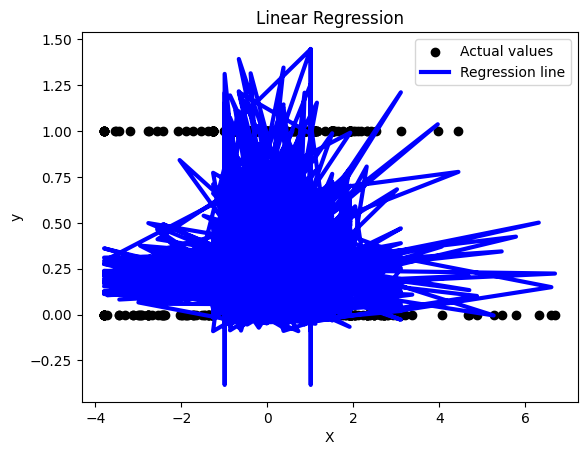

In [809]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# # defining the train x and y
# X_train_LR = train_dataDF.drop('Claim', axis=1)  
# y_train_LR = train_dataDF['Claim']

# test_dataDF
# # defining the test x and y
# X_test_LR = test_dataDF.drop('Claim', axis=1)  
# y_test_LR = test_dataDF['Claim']

# Create a Linear Regression model
linear_reg = LinearRegression()

# Check the shapes of the resulting sets
# print("Shape of X_train:", X_train.shape)
# print("Shape of X_test:", X_test.shape)
# print("Shape of y_train:", y_train.shape)
# print("Shape of y_test:", y_test.shape)

# Train the model
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_LR = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_LR)
r2 = r2_score(y_test, y_pred_LR)

print("Mean Squared Error:", mse)
print("R-squared:", r2)



# print("Shape of X_test: ", X_test.shape)
# # print(.shape)
# # print(X_test_LR.shape)
# print("Shape of Y_test: ",y_test.shape)
# # print(y_test_LR.)

# X_test_LR=np.arange(0,len(X_test_LR),1)
# Checking if the reshaped arrays have the same size
if X_test.size != y_test.size:
    # Resizing the arrays to match each other
    mininmum_size = min(X_test.size, y_test.size)
    X_test_LR = np.resize(X_test, (mininmum_size,))
    y_test_LR = np.resize(y_test, (mininmum_size,))


# print(X_test_LR.shape)
# print(y_test_LR.shape)



plt.scatter(X_test_LR, y_test_LR, color='black', label='Actual values')
plt.plot(X_test_LR, y_pred_LR, color='blue', linewidth=3, label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

#### Impementation of KNN model


In [810]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report



# defining the train x and y
# X_train_KNN = train_dataDF.drop('Claim', axis=1)  
# y_train_KNN = train_dataDF['Claim']
X_train_KNN = X_train 
y_train_KNN = y_train

test_dataDF
# defining the test x and y
# X_test_KNN = test_dataDF.drop('Claim', axis=1)  
# y_test_KNN = test_dataDF['Claim']
X_test_KNN = X_test 
y_test_KNN = y_test

# Check the shapes of the resulting sets

# print("Shape of X_train:", X_train_KNN.shape)
# print("Shape of X_test:", X_test_KNN.shape)
# print("Shape of y_train:", y_train_KNN.shape)
# print("Shape of y_test:", y_test_KNN.shape)


#KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)


# Train the classifier
knn_classifier.fit(X_train_KNN, y_train_KNN)

# Make predictions on the test set
y_pred_KNN = knn_classifier.predict(X_test_KNN)

# Evaluate the performance
accuracy = accuracy_score(y_test_KNN, y_pred_KNN)
conf_matrix = confusion_matrix(y_test_KNN, y_pred_KNN)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test_KNN, y_pred_KNN)
print("Classification Report:\n", report)
print("Confusion Matrix: \n", classification_report)

Accuracy: 0.7391759776536313
Confusion Matrix:
 [[3848  574]
 [ 920  386]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      4422
           1       0.40      0.30      0.34      1306

    accuracy                           0.74      5728
   macro avg       0.60      0.58      0.59      5728
weighted avg       0.71      0.74      0.72      5728

Confusion Matrix: 
 <function classification_report at 0x000001D3664A05E0>


#### Tune hyperparameters Grid Search or Random Search For KNN


In [811]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7]}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_classifier, param_grid, cv=3)

grid_search.fit(X_train_KNN, y_train_KNN)

# Best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# creating the final model
final_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
final_knn_classifier.fit(X_train_KNN, y_train_KNN)

# Make predictions on the test set
y_pred = final_knn_classifier.predict(X_test_KNN)
# Evaluate the performance
KNNHPaccuracy = accuracy_score(y_test_KNN, y_pred)
conf_matrix = confusion_matrix(y_test_KNN, y_pred)

print("Accuracy:", KNNHPaccuracy)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test_KNN, y_pred)
print("Classification Report:\n", report)
print("Confusion Matrix: \n", classification_report)

Accuracy: 0.7651885474860335
Confusion Matrix:
 [[4062  360]
 [ 985  321]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86      4422
           1       0.47      0.25      0.32      1306

    accuracy                           0.77      5728
   macro avg       0.64      0.58      0.59      5728
weighted avg       0.73      0.77      0.74      5728

Confusion Matrix: 
 <function classification_report at 0x000001D3664A05E0>


## Implement of Naive Bayes models

In [812]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report



# defining the train x and y
X_train_GNB = X_train 
y_train_GNB = y_train

test_dataDF
# defining the test x and y
X_test_GNB = X_test
y_test_GNB = y_test

# Check the shapes of the resulting sets

# print("Shape of X_train:", X_train_GNB.shape)
# print("Shape of X_test:", X_test_GNB.shape)
# print("Shape of y_train:", y_train_GNB.shape)
# print("Shape of y_test:", y_test_GNB.shape)


# Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()


# Train the classifier
naive_bayes_classifier.fit(X_train_GNB, y_train_GNB)

# predictions on the test set
y_pred_GNB = naive_bayes_classifier.predict(X_test_GNB)

# Performance Evaluation
accuracy = accuracy_score(y_test_GNB, y_pred_GNB)
conf_matrix = confusion_matrix(y_test_GNB, y_pred_GNB)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test_GNB, y_pred_GNB)
print("Classification Report:\n", report)
print("Confusion Matrix: \n", classification_report)

Accuracy: 0.7686801675977654
Confusion Matrix:
 [[3996  426]
 [ 899  407]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      4422
           1       0.49      0.31      0.38      1306

    accuracy                           0.77      5728
   macro avg       0.65      0.61      0.62      5728
weighted avg       0.74      0.77      0.75      5728

Confusion Matrix: 
 <function classification_report at 0x000001D3664A05E0>


## Model Evaluation: Evaluate the models using the Area Under the Curve (AUC) metric.

## SVM Evaluation

In [813]:
from sklearn.metrics import roc_auc_score, roc_curve

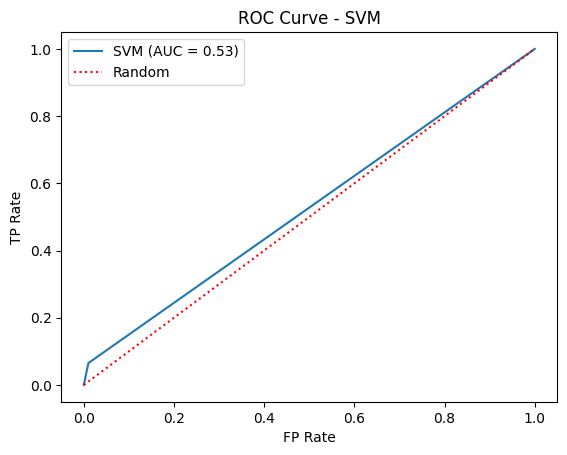

In [814]:
auc_SVM = roc_auc_score(y_test_SVM, y_pred_SVM)

fpr_svm, tpr_svm, _= roc_curve(y_test_SVM, y_pred_SVM)

plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_SVM:.2f})')

plt.plot([0, 1], [0, 1], linestyle=':', color='red', label='Random')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()


## KNN Evaluation

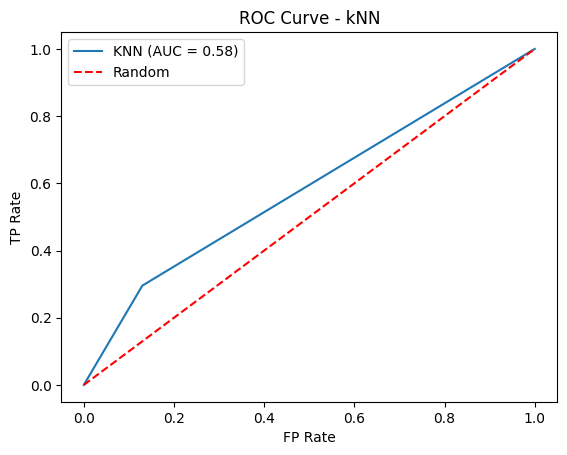

In [815]:
auc_knn = roc_auc_score(y_test_KNN, y_pred_KNN)

fpr_knn, tpr_knn, _ = roc_curve(y_test_KNN, y_pred_KNN)

plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve - kNN')
plt.legend()
plt.show()

## Naive Bayes Evaluation

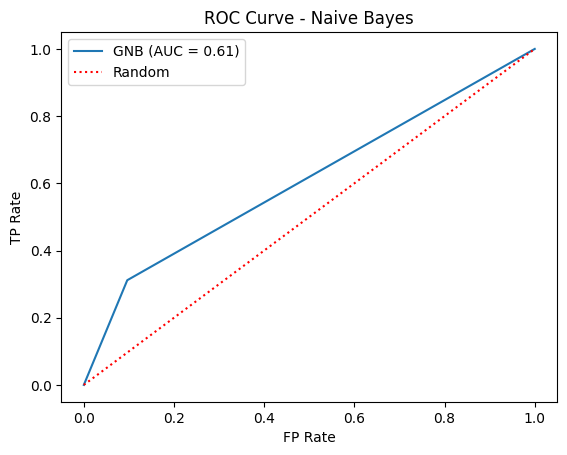

In [816]:
auc_GNB = roc_auc_score(y_test_GNB, y_pred_GNB)

fpr_GNB, tpr_GNB, _= roc_curve(y_test_GNB, y_pred_GNB)

plt.plot(fpr_GNB, tpr_GNB, label=f'GNB (AUC = {auc_GNB:.2f})')

plt.plot([0, 1], [0, 1], linestyle=':', color='red', label='Random')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()


## Linear Regression Evalution

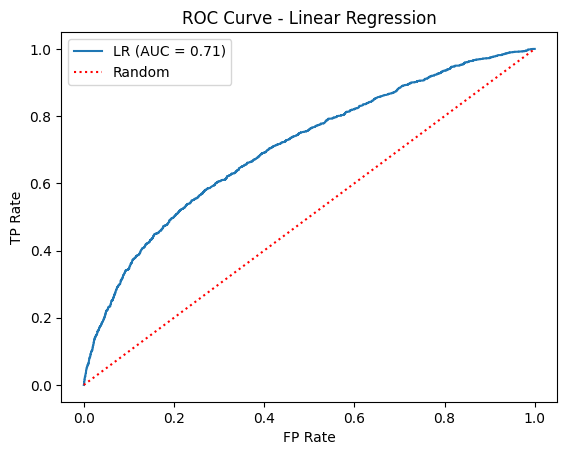

In [817]:
auc_LR = roc_auc_score(y_test_LR, y_pred_LR)

fpr_LR, tpr_LR, _= roc_curve(y_test_LR, y_pred_LR)

plt.plot(fpr_LR, tpr_LR, label=f'LR (AUC = {auc_LR:.2f})')

plt.plot([0, 1], [0, 1], linestyle=':', color='red', label='Random')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve - Linear Regression')
plt.legend()
plt.show()

## all model visual comaprison

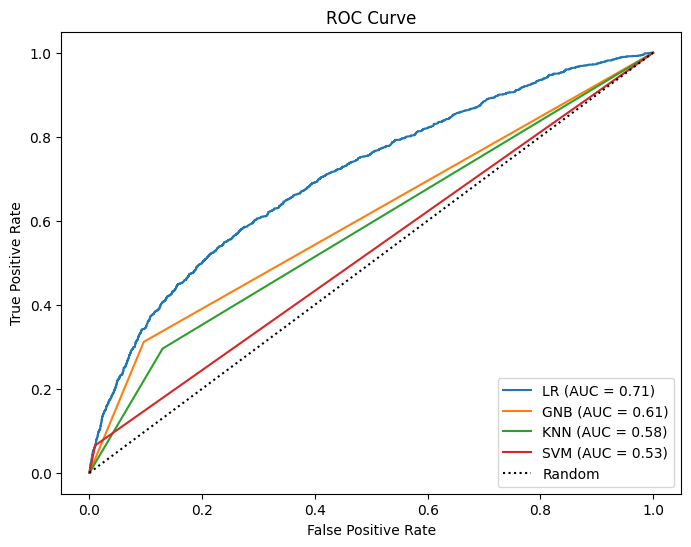

In [818]:
plt.figure(figsize=(8, 6))

plt.plot(fpr_LR, tpr_LR, label=f'LR (AUC = {auc_LR:.2f})')
plt.plot(fpr_GNB, tpr_GNB, label=f'GNB (AUC = {auc_GNB:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_SVM:.2f})')
plt.plot([0, 1], [0, 1], linestyle=':', color='black', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [819]:
accuracySVM = accuracy_score(y_test_SVM, y_pred_SVM)
accuracyKNN = accuracy_score(y_test_KNN, y_pred_KNN)
accuracyGNB = accuracy_score(y_test_GNB, y_pred_GNB)

print("Before hyperTuning SVM Accuracy", accuracySVM)
print("After hyperTuning SVM Accuracy", SVMHPaccuracy)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Before hyperTuning KNN Accuracy", accuracyKNN)
print("After hyperTuning KNN Accuracy", KNNHPaccuracy)
print("NB Accuracy", accuracyGNB)


Before hyperTuning SVM Accuracy 0.7789804469273743
After hyperTuning SVM Accuracy 0.7789804469273743
Mean Squared Error: 0.15852603888825537
R-squared: 0.09937352089839058
Before hyperTuning KNN Accuracy 0.7391759776536313
After hyperTuning KNN Accuracy 0.7651885474860335
NB Accuracy 0.7686801675977654


## Submission Preparation:  
#### Make predictions on the test dataset using the best-performing model. SVM is the model of Choice.

In [831]:

# Predictions on the test data set
y_pred_knn = knn_classifier.predict(test_dataDF)
print(y_pred_knn)


# y_pred_knn = knn_classifier.predict(X_test_knn)
# accurcy = accuracy_score(y_test_KNN, y_pred_KNN)
# conf_matrix = confusion_matrix(y_test_KNN, y_pred_KNN)

# print("Accuracy:", accuracy)
# print("Confusion Matrix:\n", conf_matrix)

# report = classification_report(y_test_KNN, y_pred_KNN)
# print("Classification Report:\n", report)
# print("Confusion Matrix: \n", classification_report)a

[0 0 0 ... 0 0 0]


## Submission File creation.

In [834]:
# print(train_data)

CustomerID = test_data['Customer Id']  

print(CustomerID.shape)
print(y_pred_knn.shape)


# # Create a DataFrame with test IDs and predictions
submission_df = pd.DataFrame({'Customer Id': CustomerID, 'Claim': y_pred_knn})

submission_df.to_csv('submission.csv', index=False)

(3069,)
(3069,)
